# Flows on the Line

Author: Sneha Ramshanker 


Date: 3rd May, 2020


Graphical Analysis of non-linear dynamics in 1-dimension

In [772]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy import optimize
import seaborn as sns
from scipy.integrate import odeint
import sympy as sym
from sympy.solvers import solve, check_assumptions
from sympy import Symbol, I
from scipy.misc import derivative
import matplotlib.patches as mpatches


In [843]:
class Flow1D:
    def __init__(self):
        self.fix = [] 
        self.params = None 
        return
    #Add and get parameters 
    def addparam(self, lst):
        self.params = lst
    def getparam(self):
        return self.params
    def addx(self, x):
        self.x = x
    def getx(self):
        return self.x
    def addx0(self, x0):
        self.x0 = x0
    def getx0(self):
        return self.x0
    def addt(self, t):
        self.t = t 
    def gett(self):
        return self.t
    def addODE(self, function, args):
        self.ODE = function
        self.args = args
    def getODE(self):
        return self.ODE 
    def gety(self):
        return( self.ODE(*self.args))
    def addfix(self, x):
        if round(x, 3) not in self.fix:
            self.fix.append(round(x, 3))
        
    def getfix(self):
        return self.fix 
    def refreshfix(self):
        self.fix = []
    def addall(self, ODE, x, t, x0, param):
        self.addparam(params)
        self.addx(x)
        self.addt(t)
        self.addx0(x0)
        self.addparam(params)
        self.addODE(ODE, (self.getx(), self.gett(), self.getparam()))
        self.addfixauto()
    
    
    #Other methods:
    def calcfix(self, guess):
        #print(optimize.root(self.getODE(), guess, args = (self.gett(), self.getparam())).x[0])
        return optimize.root(self.getODE(), guess, args = (self.gett(), self.getparam())).x[0]
    
    def integrate(self, start):
        return odeint(self.getODE(), start, self.gett(), args = (self.getparam(),))
    def classifyfix(self, fix):
        func = self.getODE()
        x0 = fix
        myargs = (self.gett(), self.getparam())
        fdot = derivative(func, x0, dx=1.0, n=1, args=(myargs), order=3)  
        if fdot<0:
            return "stable"
        if fdot>0:
            return "unstable"
        else:
            return "unknown"
    def classifyallfix(self):
        fix = self.getfix()
        stability = []
        for i in range(0, len(fix)):
            stability.append(self.classifyfix(fix[i]))
        return stability
    
    def addfixauto(self, bins = 10):
        x = self.getx()
        probe = int((max(x)-min(x))/bins)
        
        for i in range(0, bins):
            guess = (min(x) + i*bins)
            self.addfix(self.calcfix(guess))
    #Plotting Methods
    def setplotstyle(self):
        plt.style.use('ggplot')
        plt.rcParams['lines.linewidth'] = 2.15
        plt.rcParams['lines.markeredgewidth'] = 0.0
        plt.rcParams['font.size'] = 14
        plt.rcParams['axes.labelsize'] = 18
        plt.rcParams['axes.labelweight'] = 'bold'
        plt.rcParams['axes.facecolor'] = 'white'
        plt.rcParams['grid.color'] = 'black'
        plt.rcParams['grid.linestyle'] = '--'
        plt.rcParams['grid.linewidth'] = '0.25'
        plt.rcParams['grid.alpha'] = '1'
        plt.rcParams['xtick.labelsize'] = 16
        plt.rcParams['ytick.labelsize'] = 16
        plt.rcParams['legend.fontsize'] = 12
        plt.rcParams['legend.frameon'] = False
        plt.rcParams['figure.titlesize'] = 'large'
        plt.rcParams['figure.titleweight'] = 'bold'
        plt.rcParams['figure.figsize'] = (10, 8)
        plt.rcParams['axes.edgecolor'] = 'black'
        plt.rcParams['patch.edgecolor'] = 'none'
        plt.rcParams.update({'figure.max_open_warning': 0})
        plt.rcParams['legend.fontsize'] = 20
        plt.rcParams['lines.markersize'] = 10

        plt.axhline(y=0, color='k', alpha = 1)
        plt.axvline(x=0, color='k', alpha = 1)
    def setcolorpal(self, name, desat = 1):
        sns.set_palette(name, int(np.ptp(self.getx0()))+1, desat = desat)
    
    def plotflow(self, xlabel = "x", ylabel = "xdot"):
        xdot = self.gety()
        x = self.getx()
        plt.plot(x, xdot)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        return
    def plotfix(self, guess, stability = True, label = True, disp = True):
        fix = self.calcfix(guess)
        if disp == True:
            print(fix)
        if stability == True:
            if (self.classifyfix(fix) == "stable"):
                c = 'b'
            elif (self.classifyfix(fix) == "unstable") :
                c = 'g'
            else:
                c = "k"
        if label == True:
            plt.plot(fix, 0 , 'o', color = c, markersize = '10', label = self.classifyfix(fix))
        else:
            plt.plot(fix, 0 , 'o', color = c, markersize = '10')
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    def plotallfix(self, stability = True, label = True, disp = True):
        fix = self.getfix()
        for i in range(0, len(fix)):
            self.plotfix(fix[i], stability = stability, label = label, disp = disp)
    def plottraj(self, xlab = "t", ylab = "x"):
        print(xlab)
        plt.xlabel(xlab)
        plt.ylabel(ylab)
        for i in range(0, len(self.getx0())):
            plt.plot(self.gett(), self.integrate(self.getx0()[i]), label = "start: "+str(round(self.getx0()[i], 2)))
        print(xlab)
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        
        
    def quickrun(self, ODE, x, t , x0, params,  plotflow = True, plotTraj = True):
        self.addparam(params)
        self.addx(x)
        self.addt(t)
        self.addx0(x0)
        self.addparam(params)
        self.addODE(ODE, (self.getx(), self.gett(), self.getparam()))
        self.addfixauto()
        if plotflow == True:
            self.plotflow()
            self.plotallfix()
        if plotTraj == True:
            plt.figure()
            self.plottraj()
        return 0
    def plotbifur(self, var, varindex = 0, xlabel = "var", ylabel = "x"):
        param = self.getparam()
        for i in range(0, len(var)):
            self.refreshfix()

            param[varindex] = var[i]
            self.addparam(param)
            self.addall(self.getODE(), self.getx(), self.gett(), self.getx0(), self.getparam())
            classify = self.classifyallfix()
            for j in range(0, len(self.getfix())):
                if classify[j] == "stable":
                    c = 'b'
                elif classify[j] == "unstable":
                    c = 'g'
                else:
                    c = 'k'
                plt.plot(var[i], self.getfix()[j], 'o', color = c)                
            colors = ["g", "b"]
            texts = ["unstable", "stable"]
            patches = [ plt.plot([],[], marker="o", ls="", mec=None, color=colors[i], 
            label="{:s}".format(texts[i]) )[0]  for i in range(len(texts)) ]
            plt.legend(handles=patches, loc='center left', bbox_to_anchor=(1, 0.5), ncol=2, facecolor="plum", numpoints=1 )
            plt.xlabel(xlabel)
            plt.ylabel(ylabel)

# Electric Circuit

Consider the electrical circuit where a resister (R) and capacitor (C) are connected in series to a battery Vo. A resistor R and a capacitor C are in series with a battery of constant dc voltage Vo. Suppose that the switch is closed at t = 0, and that there is no charge on the capacitor initially. Let Q(t) denote the charge on the capacitor at time
t> O. Sketch the graph of Q(t)

5.0


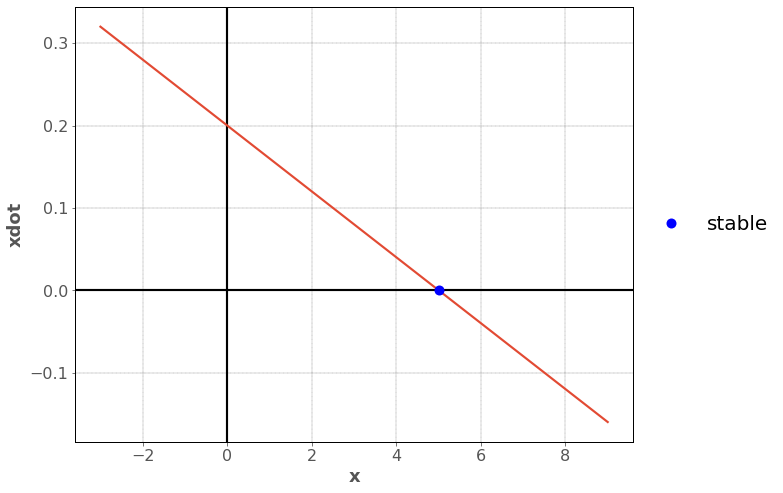

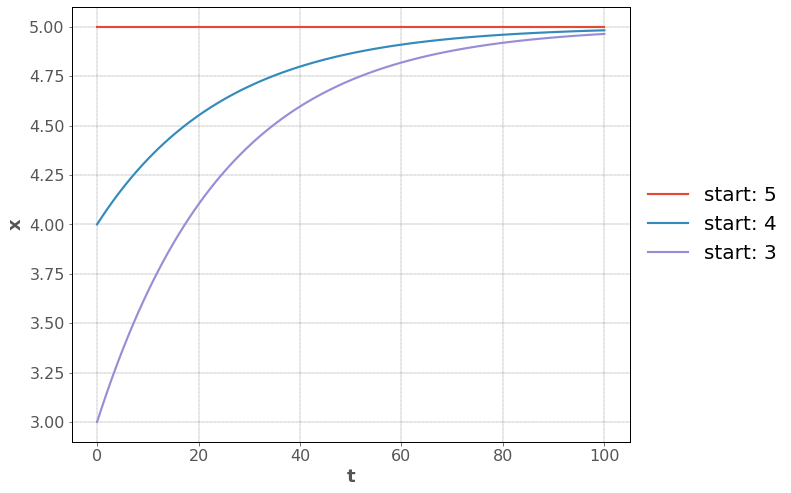

In [817]:
#Initialiting 

#Init xdot vs x Differential Equation
def Qdot(Q, t, params):
    Vo = params[0]
    R = params[1]
    C = params[2]
    return ((Vo/R)-(Q/(R*C)))


#Init Parameters 
Vo = 1
R = 5
C = 5
params = [Vo, R, C] #Input parameters in the order they appear in the differential equation
Q = np.arange(-3, 10, 1.2)
t = np.linspace(0, 100, 100)
x0 = [5, 4, 3]
RCflow = Flow1D()
RCflow.setplotstyle()
RCflow.quickrun(Qdot, Q, t, x0, params)


# Terminal Velocity 

The velocity v(t) of a skydiver falling to the ground is governed by $m\dot{v} = mg − kv^{2}$,
where m is the mass of the dkydiver, g is the acceleration due to gravity, and k > 0 is
a constant related to the amount of air resistance. Determine a relation for the terminal velocity. 

-7.003570517957654
7.003570517957655
t
t


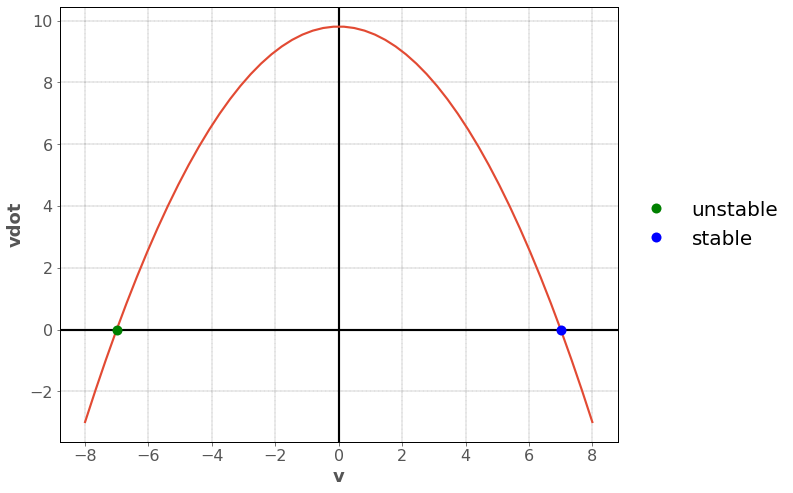

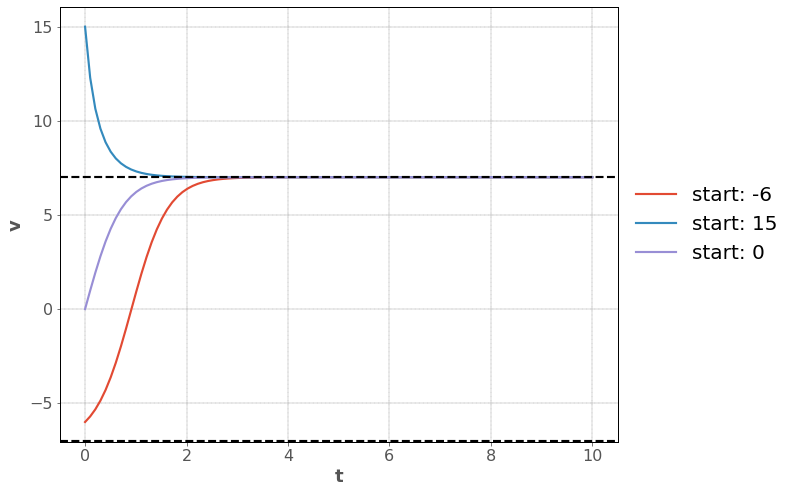

In [845]:
def vdot(v, t, params):
    m = params[0]
    k = params[1]
    g = 9.81 
    return (g - (k/m)*v**2)
m = 10
k = 2
params = [m, k]
v = np.linspace(-8, 8, 50)
t = np.linspace(0, 10, 100)
v0 = [-6, 15, 0]

fall = Flow1D()
fall.addall(vdot, v, t, v0, params )


#Plotting
fall.setplotstyle()
#fall.setcolorpal("rainbow")
fall.plotflow(xlabel = "v", ylabel = "vdot")
fall.plotallfix()

plt.figure()
fall.plottraj( ylab = "v")
for i in range(len(fall.getfix())):
    plt.axhline(y = fall.getfix()[i], linestyle = '--', color = 'k' )

# Other Flows 

Perform Numerical analysis for $\dot{x} = 4x^{2} - 16$

-2.0
0.0
2.0


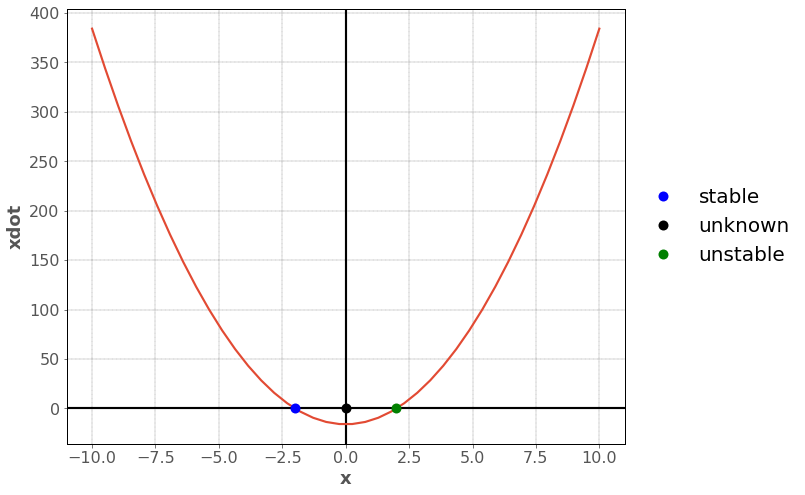

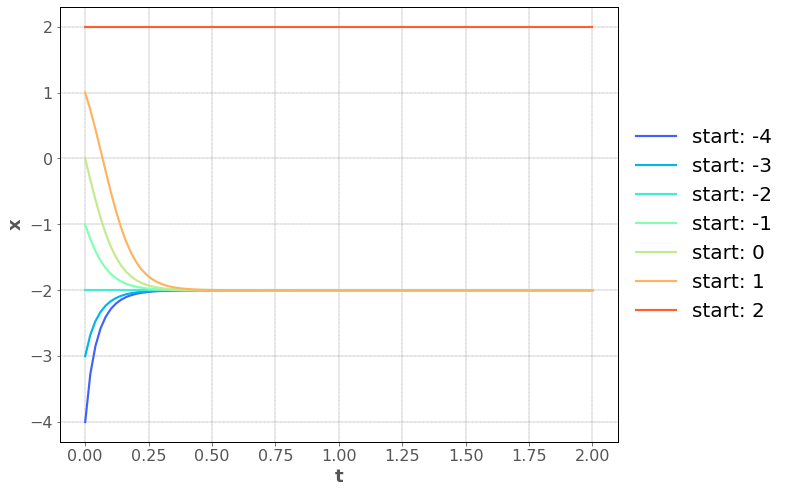

In [681]:
def xdot(x, t, params):
    return 4*x**2-16
x = np.linspace(-10, 10, 40)
t = np.linspace(0, 2, 100)
x0 = np.arange(-4, 3, 1)

flow1 = Flow1D() 
flow1.addx0(x0)
flow1.setplotstyle()
flow1.setcolorpal("rainbow", desat = 1)
flow1.quickrun(xdot, x,t, x0, None)


Perform numerical analysis for $\dot{x} = ax - x^{3}$

-1.0
1.0


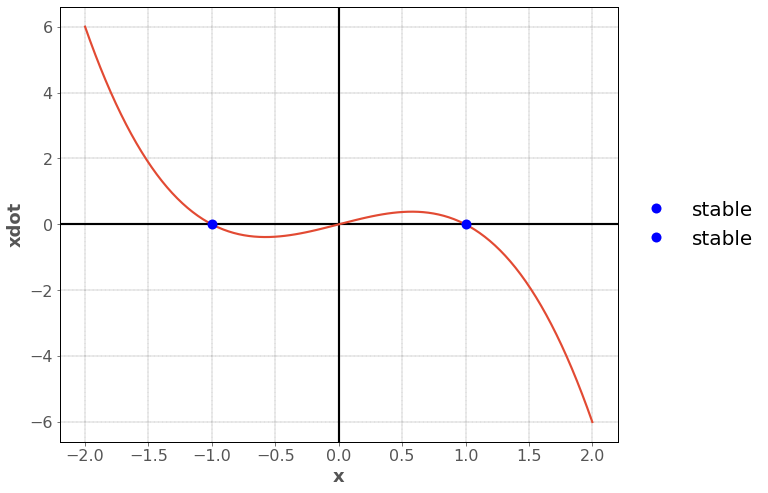

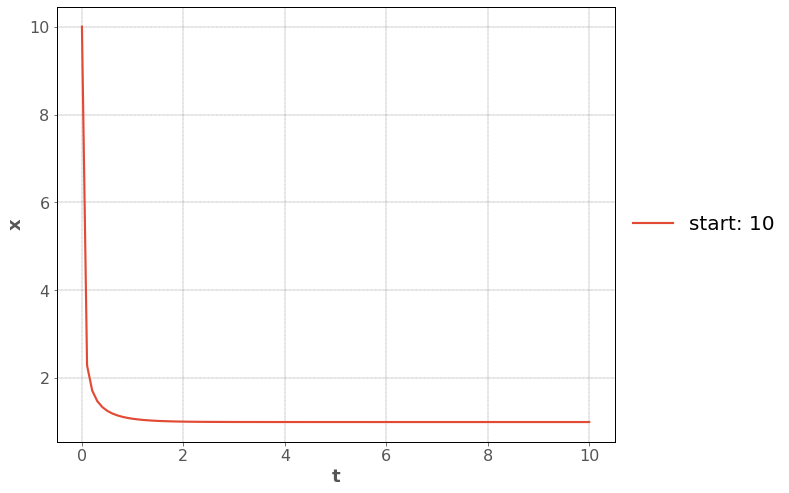

In [682]:
def xdot(x, t, params):
    a = params[0]
    return (a*x - x**3)
a = [1]
x = np.linspace(-2, 2, 100)
t = np.linspace(0, 10, 100)
x0 = [10] 
flow2 = Flow1D()
flow2.setplotstyle()
flow2.quickrun(xdot, x, t, x0, a)


# Bifurication

Analysing dependence on parameters is very interesting. 

### Saddle-Node Bifurication

This is of the form $\dot{x} = r + x^{2}$. Fixed points are destroyed and created

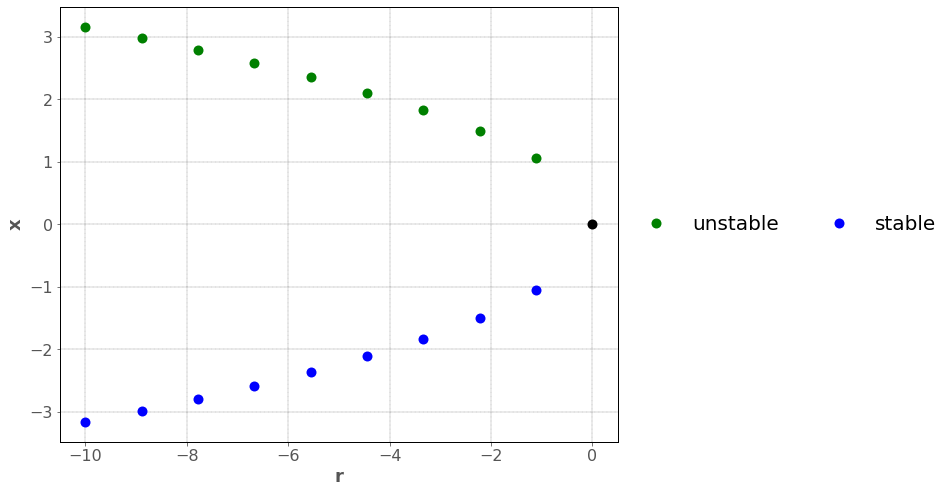

In [806]:
def xdot(x, t,param):
    r = param[0]
    return r+x**2

x = np.linspace(-5, 5, 100)
t = np.linspace(0, 10, 100)
x0 = [1]
param = [-15]

snb = Flow1D()
snb.addall(xdot, x, t, x0, param)
snb.addfixauto()

r = np.linspace(-10, 0, 10)

snb.plotbifur(r, 0, xlabel = "r")


###  Transcritical Bifurication

This is of the form $\dot{x} = r x - x^{2}$. Fixed points change stability

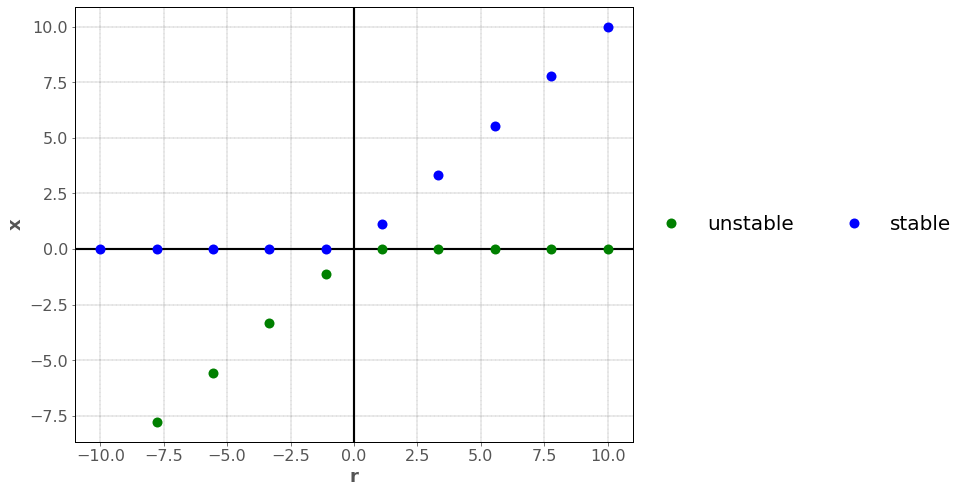

In [807]:
def xdot(x, t, params):
    r = params[0]
    return r*x - x**2

tb = Flow1D()
x = np.linspace(-4,2, 20)
t = np.linspace(0, 10, 100)
x0 = [5]
r = np.linspace(-10, 10, 10)
tb.setplotstyle()
tb.addall(xdot, x, t, x0, r)
tb.plotbifur(r, 0, xlabel = "r")

## Pitchfork Bifurication

This is of the form $\dot{x} = r x - x^{3}$. Points appearing and disappearing in symmetrical pairs

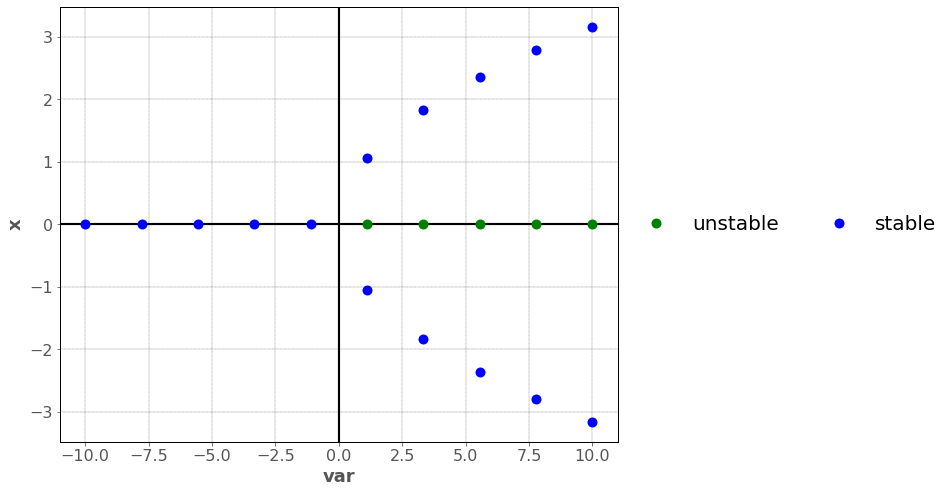

In [810]:
def xdot(x, t, params):
    r = params[0]
    return r*x - x**3

pb = Flow1D()
x = np.linspace(-10, 10, 10)
t = np.linspace(0, 10, 100)
x0 = [-5]
r = np.linspace(-10,10,10)
pb.setplotstyle()
pb.addall(xdot, x, t, x0, r)
pb.plotbifur(r)